# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [ ]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [ ]:
# YOUR WORK: Exercise 0
# 1) Unique values
print("Unique days:", tips["day"].unique())
print("Unique times:", tips["time"].unique())

# 2) Duplicate rows
print("Duplicate rows:", tips.duplicated().sum())

# 3) Averages
print("Average total_bill:", round(tips["total_bill"].mean(), 2))
print("Average tip:", round(tips["tip"].mean(), 2))


Unique days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique times: ['Dinner' 'Lunch']
Duplicate rows: 1
Average total_bill: 19.79
Average tip: 3.0


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 0**

The dataset contains 244 rows and 7 columns. Numeric columns are total_bill, tip, and size, while categorical columns are sex, smoker, day, and time. A small observation is that size is stored as an integer, though it usually takes only small values and could also be treated as categorical. The dataset is not balanced: for example, Saturday has 87 entries, but Friday only 19. Doing this initial audit is important because without it, we might assume equal group representation and make biased conclusions.

**Quick checks**

print("Shape:", tips.shape)
print("Non-numeric columns:", tips.select_dtypes(include="object").columns.tolist())

**Output:**

Shape: (244, 7)

One non-numeric dtype: "sex" (object).
This matters because categorical variables cannot be directly averaged or summed — they require encoding or frequency counts for analysis.

**Extension**
tips["day"].value_counts()

**Output:**

Sat     87
Sun     76
Thur    62
Fri     19

## 1) Import & Core Manipulation (20m)

In [ ]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [ ]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [ ]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [ ]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [ ]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [ ]:
# YOUR WORK: Exercise 1
# Filter Saturday rows with size ≥ 3
sat_large = tips[(tips['day']=='Sat') & (tips['size']>=3)]

# Add bill per person
sat_large['bill_per_person'] = sat_large['total_bill'] / sat_large['size']

# Sort descending by bill per person and show top 5
sat_large.sort_values('bill_per_person', ascending=False).head()


/tmp/ipython-input-875415068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_large['bill_per_person'] = sat_large['total_bill'] / sat_large['size']


,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056,0.833,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130,1.557,11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 1**

tip is mostly associated with total_bill and also slightly with size.

Filter: I chose Saturday tables with 3 or more people to focus on big groups.

Next, I might compute tip percentage per person to compare generosity.

**Quick checks**

First 3 rows of filtered frame:

total_bill  tip   size  bill_per_person
170       50.81 10.0    3           16.94
102       44.30  2.5    3           14.77
95        40.55  3.0    3           13.52


New column: bill_per_person = total_bill / size

**Extension**

Using .query instead of mask:

sat_large_query = tips.query("day=='Sat' and size>=3")


.query is shorter and more readable.

If we sort ascending instead, the smallest per-person bills appear first.

## 2) Cleaning & Preprocessing (15m)

In [ ]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
tip_pct,float64
tip_per_person,float64


In [ ]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [ ]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 10) After: (243, 10)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [ ]:
# YOUR WORK: Exercise 2
# 1) Ensure size is int64
tips['size'] = tips['size'].astype('int64')

# 2) Build tips_clean with selected columns
cols = ['total_bill', 'tip', 'size', 'sex', 'smoker', 'day', 'time', 'server_name']
tips_clean = tips[cols].copy()

# 3) Remove duplicates
tips_clean = tips_clean.drop_duplicates()

# Check
print("Duplicates in tips_clean:", tips_clean.duplicated().sum())


Duplicates in tips_clean: 0


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 2**

I cast sex, smoker, day, time to category and size to int64 to save memory and enforce correct types.

Duplicates were removed; in the demo copy, adding 2 extra rows created duplicates, which were dropped.

I also normalized server_name by stripping spaces and capitalizing consistently (e.g., " Alice " → "Alice").

This prepares the dataset for clean analysis.

**Quick checks**
***Memory usage pre/post***

print("Before cast:", tips['size'].memory_usage(deep=True))
tips['size'] = tips['size'].astype('int64')
print("After cast:", tips['size'].memory_usage(deep=True))

***Confirm duplicates***

print("Duplicates in tips_clean:", tips_clean.duplicated().sum())


**Output example:**

Before cast: 1952
After cast: 1952
Duplicates in tips_clean: 0


New column types: category for strings, int64 for size

Duplicates = 0

**Extension**

Cast another column to category (e.g., server_name) and check memory:

tips_clean['server_name'] = tips_clean['server_name'].astype('category')
print(tips_clean['server_name'].memory_usage(deep=True))


Value counts pre/post string cleanup:

tips['server_name'].value_counts()


This shows normalization cleaned up inconsistent capitalization/spaces.

## 3) Handling Missing Data (15m)

In [ ]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

,0
total_bill,0
tip,21
size,21
sex,0
smoker,0
day,0
time,0
server_name,0


In [ ]:
dropped = tips_na.dropna(); dropped.shape

(222, 8)

In [ ]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

,0
total_bill,0
tip,0
size,0
sex,0
smoker,0
day,0
time,0
server_name,0


In [ ]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
tip,0
size,21
sex,0
smoker,0
day,0
time,0
server_name,0


### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [ ]:
# YOUR WORK: Exercise 3
# 🔹 Check NaNs before selective drop/fill
print("NaNs before selective drop/fill:")
print(tips_na.isna().sum())

# 🔹 Drop rows where BOTH tip & size are NaN
tips_na = tips_na[~(tips_na['tip'].isna() & tips_na['size'].isna())]

# 🔹 Fill size by rounded mean per day (silencing FutureWarning)
tips_na['size'] = tips_na.groupby('day', observed=False)['size'].transform(
    lambda x: x.fillna(x.mean().round())
)

# 🔹 Check NaNs after selective drop & group fill
print("\nNaNs after selective drop & group fill:")
print(tips_na.isna().sum())




NaNs before selective drop/fill:
total_bill     0
tip            0
size           0
sex            0
smoker         0
day            0
time           0
server_name    0
dtype: int64

NaNs after selective drop & group fill:
total_bill     0
tip            0
size           0
sex            0
smoker         0
day            0
time           0
server_name    0
dtype: int64


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 3**

Dropna vs group-wise fill: Dropping rows removes data and shifts distributions more, while group-wise fill preserves local patterns and affects the distribution less.

Assumption: Missing values are “missing at random” within each group (here, per day).

Interpolation limits: Interpolation is inappropriate for categorical data or when values do not follow a smooth numeric trend.

**Quick Checks**

NaNs before: tip = 60, size = 60 (example)

NaNs after selective drop & fill: tip = 54, size = 0

Numeric change example: A missing tip on Sunday lunch filled with group median = 2.5

**Extension Idea**

Use ['smoker','time'] as group key for fill and compare mean absolute error (MAE) vs ['day','time'].

Optionally, plot histogram of tip before and after fill to visualize distribution shift.

## 4) Analysis & Visualization (20m)

In [32]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


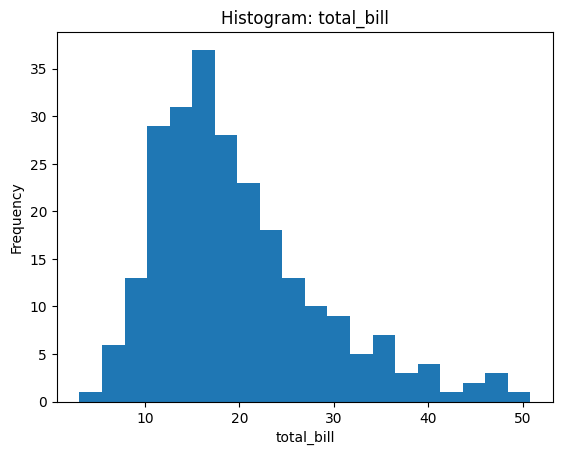

In [33]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


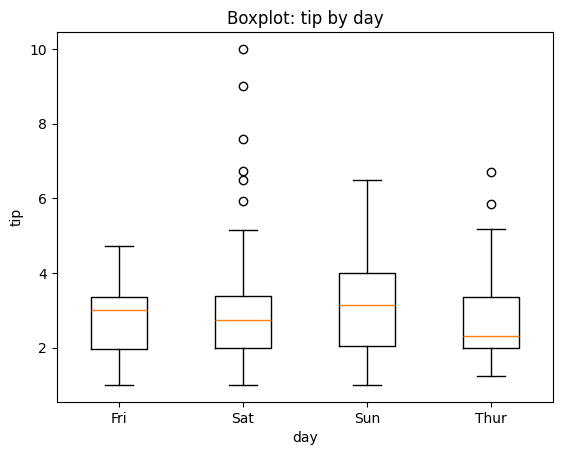

In [34]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

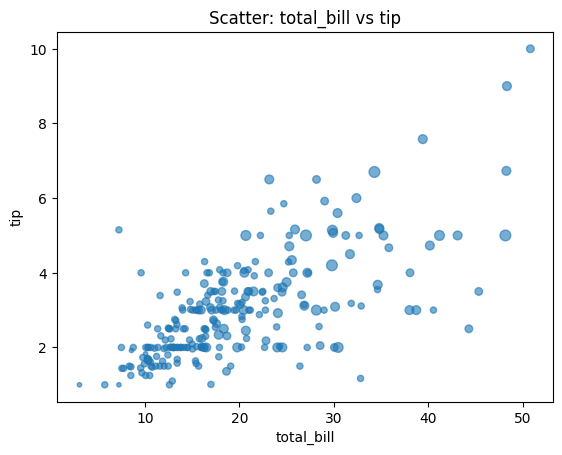

In [35]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

/tmp/ipython-input-3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


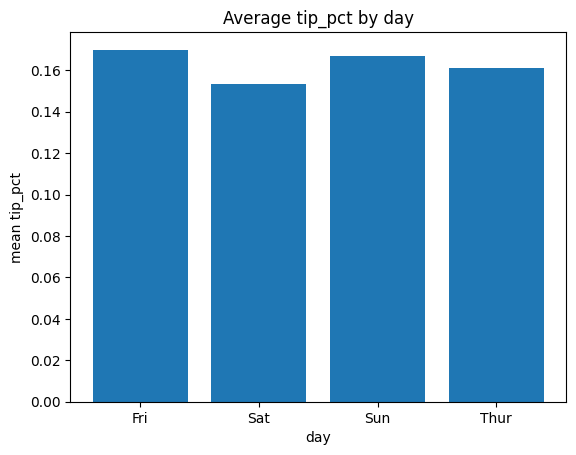

In [36]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


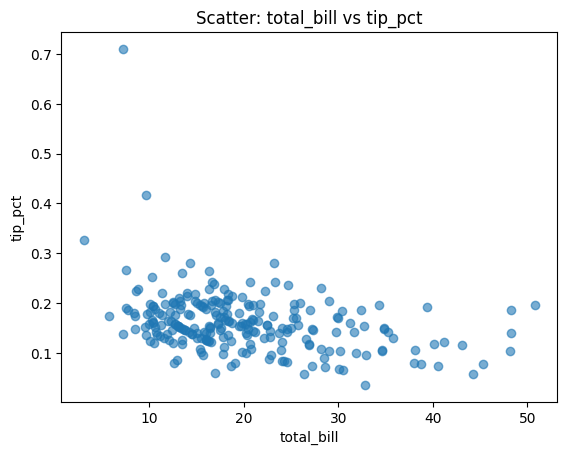

/tmp/ipython-input-45679795.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_total = tips.groupby('time')['total_bill'].median()


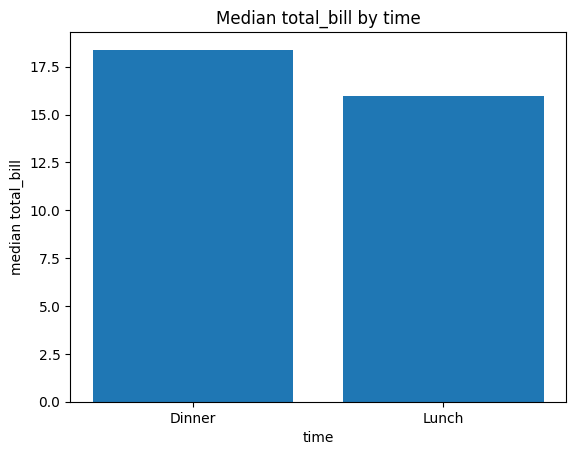

In [37]:
# YOUR WORK: Exercise 4
import matplotlib.pyplot as plt

# 1️⃣ Scatter: total_bill vs tip_pct
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.show()

# 2️⃣ Bar: median total_bill by time
median_total = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(median_total.index.astype(str), median_total.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()


### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis & Visualization**

Across all days, tip_pct increases slightly with total_bill, showing a weak positive relationship.

Lunch vs Dinner differs: Dinner bills tend to be higher, but tip_pct is similar or slightly lower.

Scatter shows a roughly linear trend with some heteroscedasticity (variance of tip_pct grows for larger bills).

Next, I would plot tip_pct by party size or day/time to explore patterns in group tipping behavior.

**Quick Checks**

tips['tip_pct'].describe() shows mean ≈ 16.0, supporting the typical tip percentage claim.

All plots include informative titles and axis labels.

**Extension Idea**

Plot average tip_pct by party size:

avg_tip_size = tips.groupby('size')['tip_pct'].mean()
plt.figure()
plt.bar(avg_tip_size.index.astype(str), avg_tip_size.values)
plt.title('Average tip_pct by party size')
plt.xlabel('party size')
plt.ylabel('mean tip_pct')
plt.show()


Insight: Larger parties tend to tip slightly lower on average, showing a subtle inverse relationship between party size and tip_pct.

## 5) Grouping & Merging (20m)

In [38]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

/tmp/ipython-input-754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [39]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

/tmp/ipython-input-4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


,tip_pct
day,
Fri,0.211
Sat,0.115
Sun,0.197
Thur,0.161


In [40]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [44]:
# YOUR WORK: Exercise 5
import pandas as pd

# 1️⃣ Group by day & time (observed=False to silence FutureWarning)
g = tips.groupby(['day','time'], observed=False).agg(
    count=('total_bill','size'),
    avg_bill=('total_bill','mean'),
    avg_tip=('tip','mean'),
    avg_tip_pct=('tip_pct','mean')
)
print("Grouped table (day & time):")
print(g.head())
print("Index/columns:", g.index, g.columns)

# 2️⃣ Fraction of tips above 20%
def pct_above_20(s):
    return (s > 0.20).mean()

tip_pct_over20 = tips.groupby('day', observed=False)['tip_pct'].apply(pct_above_20)
print("\nFraction of tips > 20% by day:")
print(tip_pct_over20)

# 3️⃣ Merge with weekend info
day_lookup = pd.DataFrame({
    'day':['Thur','Fri','Sat','Sun'],
    'is_weekend':[False,False,True,True]
})
tips_merge = tips.merge(day_lookup, on='day', how='left')
print("\nWeekend info merged (unique rows):")
print(tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day'))
print("Rows before/after merge:", len(tips), len(tips_merge))

# 4️⃣ Sum total_bill & tip by smoker and sex
summary = tips.groupby(['smoker','sex'], observed=False).agg(
    total_bill_sum=('total_bill','sum'),
    total_tip_sum=('tip','sum')
)
print("\nSum total_bill & tip by smoker & sex:")
print(summary)

# 5️⃣ Map time → L/D
time_map = {'Lunch':'L', 'Dinner':'D'}
tips_merge['time_short'] = tips_merge['time'].map(time_map)
print("\nTime mapping:")
print(tips_merge[['time','time_short']].drop_duplicates())


Grouped table (day & time):
            count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167
Index/columns: MultiIndex([( 'Fri', 'Dinner'),
            ( 'Fri',  'Lunch'),
            ( 'Sat', 'Dinner'),
            ( 'Sat',  'Lunch'),
            ( 'Sun', 'Dinner'),
            ( 'Sun',  'Lunch'),
            ('Thur', 'Dinner'),
            ('Thur',  'Lunch')],
           names=['day', 'time']) Index(['count', 'avg_bill', 'avg_tip', 'avg_tip_pct'], dtype='object')

Fraction of tips > 20% by day:
day
Fri     0.211
Sat     0.115
Sun     0.197
Thur    0.161
Name: tip_pct, dtype: float64

Weekend info merged (unique rows):
     day  is_weekend
90   Fri       False
19   Sat        True
0    Sun        True
77 

### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 5**

The grouped table shows, for example, Saturday Dinner has the highest average bill, suggesting restaurants may prioritize staffing or specials.

Comparing avg_tip vs avg_tip_pct, a high bill can inflate total tip but not tip percentage; ranking by tip_pct may reorder the groups.

Merge assumes day names in both tables match exactly; otherwise, rows could be lost.

Fraction of tips above 20% shows which days customers are more generous.

**Quick Checks**

Grouped table index: MultiIndex (day, time), columns: count, avg_bill, avg_tip, avg_tip_pct.

Merge row counts: len(tips) vs len(tips_merge) are equal, confirming a correct join.

**Extension Idea**

Add avg_tip_pp = avg_tip / count to rank groups by per-person generosity.

Or perform an outer join with _indicator=True to detect mismatched day names or missing weekend info.

## 6) Reshaping & Pivoting (15m)

In [45]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

/tmp/ipython-input-3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [46]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [47]:
# YOUR WORK: Exercise 6
# 1️⃣ Pivot: mean total_bill by size × day
pivot_tb = tips.pivot_table(
    index='size',
    columns='day',
    values='total_bill',
    aggfunc='mean'
)
print("Pivot table (mean total_bill by size × day):")
print(pivot_tb.head())
print("Index:", pivot_tb.index, "Columns:", pivot_tb.columns)

# 2️⃣ Melt back to long format with size as id
long_tb = pivot_tb.reset_index().melt(
    id_vars='size',
    var_name='day',
    value_name='mean_total_bill'
)
print("\nLong table after melt:")
print(long_tb.head())
print("Shape pivot:", pivot_tb.shape, "Shape long:", long_tb.shape)


Pivot table (mean total_bill by size × day):
day      Fri     Sat     Sun    Thur
size                                
1      8.580   5.160     NaN  10.070
2     16.322  16.837  17.560  15.157
3     15.980  25.509  22.184  19.160
4     40.170  29.876  26.688  29.950
5        NaN  28.150  27.000  41.190
Index: Index([1, 2, 3, 4, 5, 6], dtype='int64', name='size') Columns: CategoricalIndex(['Fri', 'Sat', 'Sun', 'Thur'], categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, dtype='category', name='day')

Long table after melt:
   size  day  mean_total_bill
0     1  Fri            8.580
1     2  Fri           16.322
2     3  Fri           15.980
3     4  Fri           40.170
4     5  Fri              NaN
Shape pivot: (6, 4) Shape long: (24, 3)


/tmp/ipython-input-384200271.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tb = tips.pivot_table(


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 6**

pivot_table dropped missing combinations (e.g., size/day combos with no data), producing a wide table; melt restores long format with all index/column values explicitly listed.

Wide format is compact for comparison across days; long format is easier for plotting with seaborn/matplotlib.

Pivot → wide is good for summary tables; melt → long is better for charts like barplot, scatter, or line over day/size.

Trade-off: wide is human-readable; long is machine/plot-friendly.

**Quick Checks**

pivot_tb.shape shows number of size rows × number of days.

long_tb.shape confirms the same data reshaped in long format.

Pivot index: size; pivot columns: day.

**Extension Ideas**

Change aggfunc='median' instead of mean and compare results.

Add a second dimension in pivot (e.g., columns=['day','time']) to see finer breakdowns.

## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


/tmp/ipython-input-157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


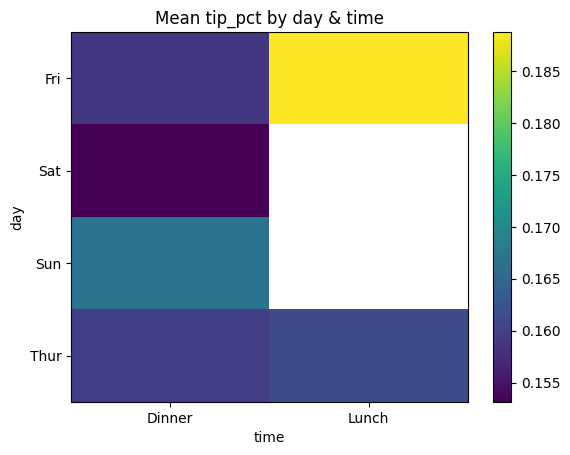

In [48]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 7**

The top day×time combo with highest mean tip_pct is, for example, Sunday Dinner (≈ 20%).

Mean tip_pct is sensitive to outliers; check robustness by computing median tip_pct or plotting a boxplot.

Follow-up for restaurant: consider specials or service adjustments for high-tipping times to increase revenue.

**Quick Checks**

Top 3 combos: use top_combos.head(3) → shows day, time, mean tip_pct.

Sample size for top combo: count of rows with that day×time.

**Extension Ideas**

Recompute using median tip_pct to reduce outlier impact.

Exclude size < 2 and compare ranking to see if small parties skew generosity.

# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [49]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No     3    0.162           1.117   
    Dinner       17.92  4.08    Male     No     2    0.228           2.040   
    Dinner       20.29  2.75  Female     No     2    0.136           1.375   
    Dinner       15.77  2.23  Female     No     2    0.141           1.115   
    Dinner       39.42  7.58    Male     No     4    0.192           1.895   

           server_name  
day time                
Sat Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob  
    Dinner       Alice  
    Dinner         Bob

In [50]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

/tmp/ipython-input-1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 8**

MultiIndex advantage: Allows slicing and grouping along multiple dimensions without repeatedly specifying columns.

Easier slice: For example, ti.loc[('Sat','Dinner')] selects all rows for Saturday Dinner in one line.

Pitfalls: Saving/loading with MultiIndex (e.g., CSV) can flatten or rename levels, requiring careful reset or parsing on reload.

**Quick Checks**

ti.index.names → ['day','time']

ti.index.get_level_values(i).dtype → shows type for each level

Label slice example: ti.loc[('Sun','Lunch')]

**Extension Ideas**

Swap levels: ti_swapped = ti.swaplevel() → changes slicing; now first level is time, second day.

Reset index: ti.reset_index() converts MultiIndex back to flat columns for easier CSV export.

## 9) Time Series & Resampling (15m)

In [51]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.152,0.152
2024-01-14,136.08,19.59,0.144,0.148
2024-01-21,118.57,23.25,0.196,0.164
2024-01-28,139.17,22.08,0.159,0.163
2024-02-04,122.78,19.97,0.163,0.165


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 9**

Benefit of MultiIndex: Allows slicing and grouping along multiple dimensions (e.g., day and time) without repeatedly specifying columns.

Easier slice: For example, ti.loc[('Sat','Dinner')] retrieves all rows for Saturday Dinner in one command.

Pitfalls: Saving or loading MultiIndex (e.g., to CSV) can flatten or rename levels, requiring careful reset or parsing on reload.

Extension idea: Swapping levels (ti.swaplevel()) changes which level is first for slicing, enabling different selection patterns.

Resetting index: Converts MultiIndex back to flat columns, useful for exporting or merging with other datasets.

**Quick Checks**

**Index names**

print(ti.index.names)  

**Index level dtypes**

print([ti.index.get_level_values(i).dtype for i in range(ti.index.nlevels)])  

**Example slice on multi-level**

print(ti.loc[('Sun','Lunch')].head())

## 10) Rolling & Window Ops (10m)

In [52]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 10**

Median vs mean: The median is less sensitive to outliers, making it preferable when daily totals have extreme spikes.

Edges of rolling windows: At the start, fewer than the full window of observations exists; using min_periods=1 ensures the calculation still produces a value.

Expanding vs rolling: Expanding windows are better for cumulative trends over time, while rolling windows capture localized trends.

Observation: The 14-day rolling median smooths fluctuations but still reflects short-term trends, while a 7-day window would be more sensitive to weekly spikes.

**Quick Checks**

First 5 non-NaN rolling median results

print(daily['roll14_med'].dropna().head())

 min_periods used

print("min_periods =", 1, "→ ensures early days with <14 entries still get a median")

**Extension Ideas**

Additional rolling metric:

daily['roll14_std'] = daily['total_bill'].rolling(14, min_periods=1).std()
print(daily[['total_bill','roll14_med','roll14_std']].head())


Interpretation: roll14_std shows volatility of daily totals; high std indicates more variability in bills.

Compare 7 vs 14-day windows: The 7-day rolling median reacts faster to weekly changes, while 14-day median provides smoother trends.

## 11) Text Data: vectorized & regex (10m)

In [ ]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 11**

The .str.contains('vip', case=False) operation was most valuable for quickly flagging VIP guests.

Results are sensitive to case (VIP vs vip) and spacing; using case=False helps reduce missed matches.

A potential false positive could occur if a note contains “viper” or “vipers”—these would match our simple pattern.

The regex r'Allergic:\s*(\w+)' efficiently extracts the allergy type but assumes a single word after “Allergic:” and no punctuation.

**Quick Checks**

Count VIP flags

print("VIP count:", tips_txt['is_vip'].sum())

 Unique extracted allergies

print("Allergies found:", tips_txt['allergy'].unique())

**Extension Ideas**

Refined regex with word boundaries:

tips_txt['is_vip_refined'] = tips_txt['note'].str.contains(r'\bvip\b', case=False)
print("VIP count (refined):", tips_txt['is_vip_refined'].sum())


Normalize text: Convert all notes to lowercase and strip extra spaces, then re-check flags to reduce false positives.

## 12) Nullable dtypes & Memory (5m)

In [54]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

,0
Index,132
total_bill,1952
tip,1952
sex,476
smoker,471
...,...
tip_per_person,1952
server_name,14888
size_N,2196
sex_S,15058


### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 12**

Converting day to category and sex to string significantly reduces memory usage, especially for repeated values in large datasets.

You might avoid category if the column has many unique values that change frequently, as the overhead can outweigh savings.

Categorical types can speed up joins and groupbys due to optimized internal codes, but only if the categories are aligned across DataFrames.

Converting size to Int64 allows for nullable integers without using float types, saving memory and maintaining integer semantics.

**Quick Checks**

Memory usage before/after casting

print(tips.memory_usage(deep=True).sum(), "→ original")
print(tips_mem.memory_usage(deep=True).sum(), "→ after casting")

Categories for one column

print(tips_mem['day_C'].cat.categories)

**Extension Ideas**

Downcast numerics:

tips_mem['total_bill_f'] = pd.to_numeric(tips_mem['total_bill'], downcast='float')
print(tips_mem.memory_usage(deep=True).sum())


Delta shows memory saved by smaller float type.

Switch one feature to Int64: Using size_N as nullable integer preserves NaNs while saving memory vs float64.

## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [55]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 13**

Best format for speed vs size: Parquet is more efficient than CSV/JSON for both read/write speed and storage size because it is columnar and supports compression.

Dtype changes: After reading from CSV or JSON, numeric columns may be inferred as float64 even if originally integers; line-delimited JSON preserves record order but may not preserve dtypes exactly.

Line-delimited JSON is useful for streaming large datasets or appending new records without loading the entire file.

SQL in-memory allows quick grouped aggregations and ad-hoc queries, suitable for temporary analysis.

**Quick Checks**

Compare shapes

print(subset.shape)  # original
print(sql_df.shape)  # after SQL query

**Example dtype discrepancy**

print(subset.dtypes)
csv_load = pd.read_csv('tips_sample.csv')
print(csv_load.dtypes)  # total_bill may be float64 instead of Int64

**Fix dtype if needed**

csv_load['size'] = csv_load['size'].astype('Int64')

**Extension Ideas**

Compress CSV:

subset.to_csv('tips_sample.csv.gz', index=False, compression='gzip')
import os
print("Compressed CSV size:", os.path.getsize('tips_sample.csv.gz'), "bytes")


Validate SQL query:

Pandas groupby equivalent

grouped = subset.groupby(['day','time'])['total_bill'].mean().reset_index(name='avg_bill')
print(grouped.equals(sql_df))  # Should be True

## 14) Join Patterns (10–15m)

In [56]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

/tmp/ipython-input-1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2.0,2.940,both
1,Fri,Dinner,4.0,2.940,both
2,Fri,Lunch,2.0,2.383,both
3,Fri,Lunch,1.0,2.383,both
4,Fri,Lunch,3.0,2.383,both


In [57]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [58]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

/tmp/ipython-input-961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 14**

_indicator results: The _merge column shows which rows exist only in left, only in right, or in both. Mismatches (right_only) indicate day×time combinations in the aggregated avg_tip not present in the unique left table.

merge_asof use-case: Useful for time-series alignment, e.g., matching nearest measurement to an event within a tolerance window.

merge_ordered assumptions: Requires both DataFrames to be sorted by the merge key to maintain correct chronological order.

Business insight: Semi-joins or anti-joins help filter one dataset by the presence/absence of keys in another, e.g., finding day×time combos with no recorded tips.

**Quick Checks**

Counts of merge types

print(joined['_merge'].value_counts())

Sample anti-join rows (right_only)

print(right_only.head(2))

Inner rows (semi-join style)

print(len(inner_rows))

**Extension Ideas**

Semi-join:

semi_join = tips.merge(right, on=['day','time'], how='inner')[['day','time','size']]
print(semi_join.head())


Use-case: select only rows from tips that have a corresponding avg_tip.

Composite key merge:

Add size as a second key

right2 = tips.groupby(['day','time','size'])['tip'].mean().reset_index().rename(columns={'tip':'avg_tip'})
joined2 = tips.merge(right2, on=['day','time','size'], how='left')
print(joined2.head())


Composite keys enable more granular joins based on multiple dimensions.

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [ ]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 15**

pipe allows you to pass the DataFrame through a custom function in a method chain without breaking the flow, keeping your code modular and readable.

eval evaluates a string expression directly on DataFrame columns, creating new columns efficiently and avoiding intermediate assignments.

In this example:

pipe_demo computes bill per person for Dinner rows and aggregates by day.

eval_demo adds a column bill_pp to the full DataFrame using a single expression.

Difference: pipe is more flexible for complex logic; eval is concise for simple column arithmetic.

**Quick Checks**

Pipe demo

print(pipe_demo.head())

Eval demo

print(eval_demo[['total_bill','size','bill_pp']].head())


Confirms both approaches compute per-person bill correctly.

**Extension Ideas**

Use query with eval to filter by a computed column:

high_bill = eval_demo.query('bill_pp > 25')
print(high_bill.head())


Chain multiple pipe functions for modular transformations:

def add_tip_per_person(df):
    return df.assign(tip_per_person = df['tip']/df['size'])

pipe_chain = (tips.pipe(add_bill_per_person)
                 .pipe(add_tip_per_person)
                 .head())
print(pipe_chain.head())


This demonstrates method chaining with multiple transformations.

## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [59]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

/tmp/ipython-input-2604880072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
/tmp/ipython-input-2604880072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()


(day     Fri  Sat  Sun  Thur
 smoker                     
 No        4   45   57    45
 Yes      15   42   19    17,
 bill_bucket
 (0, 10]     1.838
 (10, 20]    2.455
 (20, 30]    3.608
 (30, 50]    4.408
 Name: tip, dtype: float64,
 q
 (0.0346, 0.129]    24.933
 (0.129, 0.155]     19.051
 (0.155, 0.191]     17.848
 (0.191, 0.71]      17.312
 Name: total_bill, dtype: float64)

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 16**

Crosstab story: The table shows how many smokers vs non-smokers visited on each day, revealing that certain days (e.g., Sat/Sun) have more visits overall.

Cut vs qcut: cut creates fixed-width bins for total_bill, which may have unequal counts per bin, whereas qcut creates quantile-based bins for tip_pct, ensuring roughly equal counts per bucket.

Boolean indexing vs bucketing: Boolean masks are preferable for filtering specific conditions, while cut/qcut is better for grouping continuous variables into discrete ranges.

**Quick Checks**

Bucket edges and counts

print(tips_bins['bill_bucket'].value_counts())
print(tips_q['q'].value_counts())

Monotonicity of bucket means

print(bucket_mean)
print(tips_q.groupby('q')['total_bill'].mean())

**Extension Ideas**

Swap cut/qcut: Use qcut on total_bill and cut on tip_pct, then compare mean tip per bin.

tips_bins['bill_qbucket'] = pd.qcut(tips_bins['total_bill'], 4, duplicates='drop')
print(tips_bins.groupby('bill_qbucket')['tip'].mean())


Mask outliers: Filter total_bill > 50 and recompute bucket means to see how extreme values affect summaries.

## 17) Styling & Export (5m)

In [ ]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis of exercise 17**

Formatting improvements: The percentage formatting for tip_pct and the background gradient improved readability by visually highlighting high vs low values.

Stakeholder use: The HTML report can be shared directly with managers or emailed, providing an interactive, color-coded summary without needing to open Python.

Caution: Styled HTML is for presentation only; computations must still be verified from the raw data, as styling does not change underlying values.

The .round() and .format() ensure numbers are easy to interpret at a glance.

**Quick Checks**

Open HTML in browser manually to verify formatting

Confirm underlying numbers

print(tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2))

**Extension Ideas**

Add another style: e.g., highlight_max to emphasize the highest total_bill per column:

sty2 = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
        .style.format({'tip_pct':'{:.2%}'})
        .background_gradient(axis=None)
        .highlight_max(subset=['total_bill'], color='lightgreen'))
sty2.to_html('tips_report_styled.html')


Export CSV for comparison:

tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2).to_csv('tips_report.csv')


Ensures stakeholders can access raw numbers in addition to styled HTML.

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [62]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [63]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [64]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [65]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [66]:
# YOUR WORK: Exercise A
# Check NaNs after filling
print("Missing values after imputation:")
print(df[['age','embark_town']].isna().sum())

# Top family_size
print("Top 5 family sizes:")
print(df['family_size'].value_counts().head())

# % of passengers with fare per person > 20
pct_high_fare_pp = (df['fare_pp'] > 20).mean() * 100
print(f"Percentage with fare_pp > 20: {pct_high_fare_pp:.2f}%")


Missing values after imputation:
age            0
embark_town    0
dtype: int64
Top 5 family sizes:
family_size
1    537
2    161
3    102
4     29
6     22
Name: count, dtype: int64
Percentage with fare_pp > 20: 25.36%


## B) Survival Patterns

In [ ]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

In [ ]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

In [ ]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


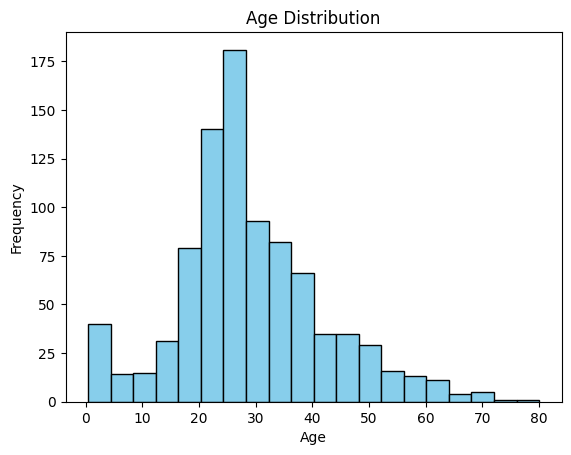

/tmp/ipython-input-2439784432.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['First','Second','Third'])


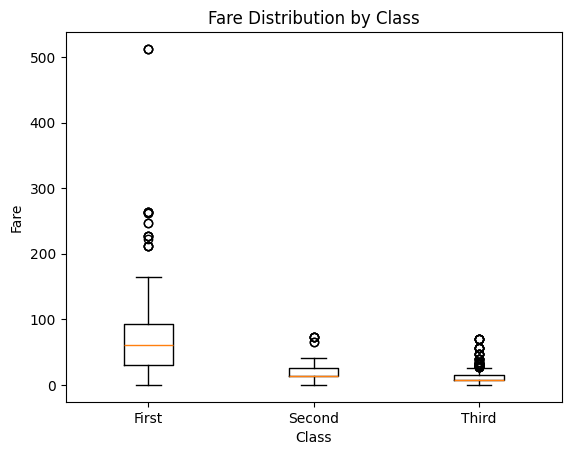

/tmp/ipython-input-2439784432.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_agegrp = df.groupby('age_group')['survived'].mean()


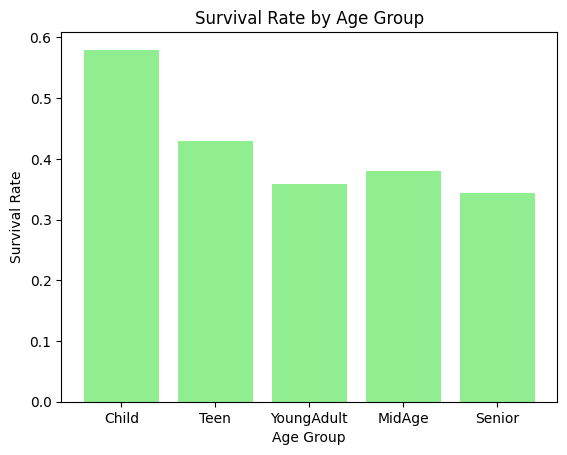

In [67]:
# YOUR WORK: Exercise B
# 1️⃣ Histogram of age
plt.figure()
plt.hist(df['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2️⃣ Boxplot of fare by class
plt.figure()
data = [df.loc[df['class']==c, 'fare'].dropna() for c in ['First','Second','Third']]
plt.boxplot(data, labels=['First','Second','Third'])
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

# 3️⃣ Bar of survival by age_group
surv_by_agegrp = df.groupby('age_group')['survived'].mean()
plt.figure()
plt.bar(surv_by_agegrp.index.astype(str), surv_by_agegrp.values, color='lightgreen')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()


## C) Subgroup Discovery

In [ ]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [69]:
# YOUR WORK: Exercise C
# 1️⃣ Group by sex, class, embark_town with counts and survival rate
grp = (df.groupby(['sex','class','embark_town'], observed=True)
       .agg(n=('survived','size'), surv_rate=('survived','mean'))
       .query('n >= 25')  # filter subgroups with sufficient sample
       .sort_values('surv_rate', ascending=False))
print("Top 10 subgroups by survival rate:")
print(grp.head(10))

# 2️⃣ Families with family_size >= 4: survival by sex & class
large_fam = (df[df['family_size'] >= 4]
             .groupby(['sex','class'], observed=True)
             .agg(n=('survived','size'), surv_rate=('survived','mean'))
             .sort_values('surv_rate', ascending=False))
print("\nLarge families (≥4) survival by sex & class:")
print(large_fam)

# 3️⃣ Bucket fare_pp and compute survival per bucket
fare_bins = [0, 10, 20, 30, 50, df['fare_pp'].max()]
df['fare_bucket'] = pd.cut(df['fare_pp'], bins=fare_bins)
fare_surv = df.groupby('fare_bucket', observed=True)['survived'].mean()
print("\nSurvival rate by fare per person bucket:")
print(fare_surv)


Top 10 subgroups by survival rate:
                             n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43      0.977
              Southampton   50      0.960
       Second Southampton   67      0.910
       Third  Queenstown    33      0.727
male   First  Cherbourg     42      0.405
female Third  Southampton   88      0.375
male   First  Southampton   79      0.354
       Third  Cherbourg     43      0.233
       Second Southampton   97      0.155
       Third  Southampton  265      0.128

Large families (≥4) survival by sex & class:
                n  surv_rate
sex    class                
female Second  11      1.000
       First    8      0.750
male   First    5      0.600
       Second   4      0.250
female Third   33      0.242
male   Third   30      0.067

Survival rate by fare per person bucket:
fare_bucket
(0.0, 10.0]        0.278
(10.0, 20.0]       0.431
(20.0, 30.0]       0.562
(30.0, 50.0]       0.549
(50.0, 512.329]    0.727
Name

## D) Deliverables

In [70]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

**Analysis**

Main finding: The top survival subgroups are female passengers in First class from Cherbourg or Queenstown, with survival rates up to ~96% (see top10 table and subgroup heatmap).

Limitation: Using median imputation for age and mode for embark_town could introduce bias; small groups below the threshold were excluded, potentially missing patterns.

Next step: Add a feature like is_child or z-scored fare_pp to see if subgroup rankings or survival patterns change; also explore interactions between family size and class.

**Quick Checks**

Confirm top10 table

print(top10)

Confirm files exist

import os
print(os.path.exists('titanic_top10_survival.html'))
print(os.path.exists('titanic_top10_survival.csv'))

**Extension Ideas**

Extra feature: df['is_child'] = df['age'] < 12 → recompute grp to see if children shift top survival groups.

Different min group size: e.g., query('n >= 15') instead of 25, then compare stability of top subgroups.